In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
 

In [2]:
df2=pd.read_csv("data2016.csv")

In [3]:
df2.head()


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [5]:
selected_columns = ['Electricity(kBtu)','NaturalGas(kBtu)','TotalGHGEmissions']
new_df = df2[selected_columns].copy()

# Display the new DataFrame
print(new_df)

      Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions
0          3.946027e+06      1.276453e+06             249.98
1          3.242851e+06      5.145082e+06             295.86
2          4.952666e+07      1.493800e+06            2089.28
3          2.768924e+06      1.811213e+06             286.43
4          5.368607e+06      8.803998e+06             505.01
...                 ...               ...                ...
3371       5.242709e+05      3.254750e+05              20.94
3372       3.965461e+05      5.537300e+05              32.17
3373       1.792159e+06      3.973739e+06             223.54
3374       3.488702e+05      3.706010e+05              22.11
3375       4.325542e+05      7.203420e+05              41.27

[3376 rows x 3 columns]


In [6]:
# Assuming 'new_df' is the DataFrame you want to export
new_df.to_csv('final_data.csv', index=False)


In [7]:
new_df=new_df.dropna().reset_index(drop=True) 

In [8]:
#independent and dependent features
X=new_df.drop('TotalGHGEmissions',axis=1)
y=new_df['TotalGHGEmissions']

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [11]:
X_train_scaled

array([[-0.03152216, -0.19121639],
       [ 1.13828297,  0.22578288],
       [-0.32105385, -0.03182773],
       ...,
       [ 2.75080487,  2.37573207],
       [ 0.30230699, -0.13965081],
       [ 2.08334526, -0.19121639]])

In [12]:
## Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score",score)


Mean absolute error 45.120982099986165
R2 Score 0.8127396005322286


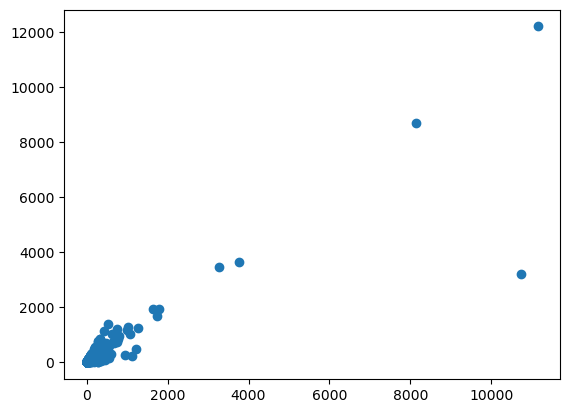

In [13]:
plt.scatter(y_test,y_pred)

Mean absolute error 45.105877628022576
R2 Score 0.8127471890612279


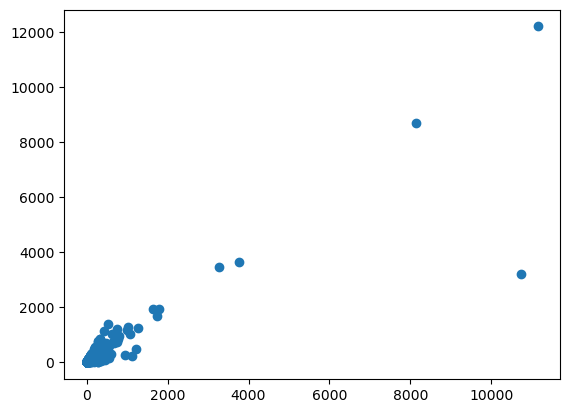

In [14]:
## Ridge Regression model

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

In [28]:
from sklearn.ensemble import RandomForestRegressor 

  

model = RandomForestRegressor() 

model.fit(X_train, y_train) 

predictions = model.predict(X_test) 

 

In [16]:
predictions

array([2.8455330e+02, 2.4652300e+01, 2.3006020e+02, 1.8082050e+02,
       1.2887000e+01, 5.3153000e+00, 5.1123200e+01, 2.6165900e+01,
       4.7555600e+01, 1.8655050e+02, 9.4194400e+01, 1.0741500e+01,
       3.8992000e+00, 1.9623920e+02, 7.2122000e+00, 1.7211600e+01,
       1.5268640e+02, 7.2100000e+00, 2.3276000e+01, 2.3727260e+02,
       2.3792100e+01, 3.0861310e+02, 9.7803000e+00, 2.6807600e+01,
       2.5477240e+02, 4.5022170e+02, 6.8749000e+00, 1.6204100e+01,
       4.7209000e+00, 3.0047600e+01, 1.5970000e+01, 3.7085700e+01,
       1.9821000e+01, 2.9380400e+01, 2.1359770e+02, 3.7830200e+02,
       1.4307600e+01, 6.7570000e+00, 3.4868960e+02, 4.1778600e+01,
       7.5549500e+01, 3.4000700e+01, 5.7378000e+00, 2.6112300e+01,
       3.0016400e+01, 5.6627000e+00, 8.8136100e+01, 5.4666000e+00,
       1.1233400e+01, 2.3310080e+02, 5.2322000e+00, 2.7204200e+01,
       9.5245300e+01, 7.1912000e+00, 9.5028600e+01, 1.4882770e+02,
       1.0098680e+02, 7.8202800e+01, 3.2964400e+01, 3.8889100e

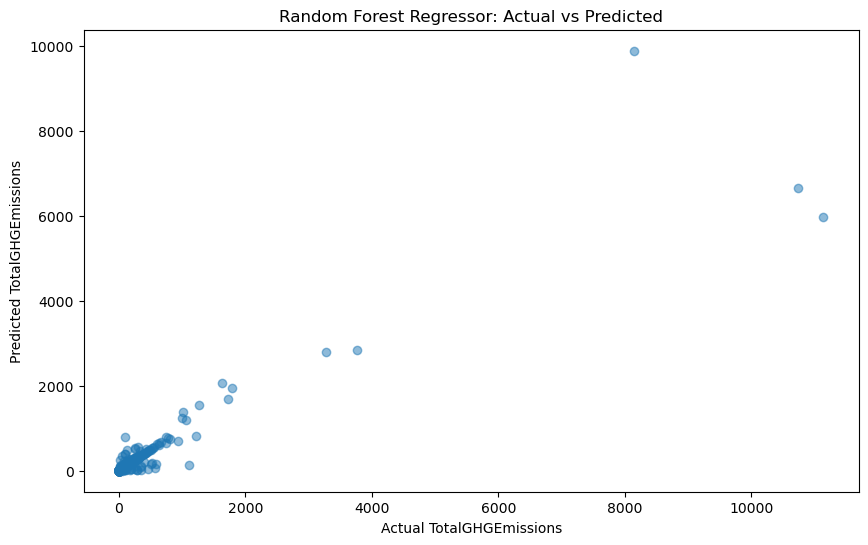

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test,predictions, alpha=0.5)
plt.title('Random Forest Regressor: Actual vs Predicted')
plt.xlabel('Actual TotalGHGEmissions')
plt.ylabel('Predicted TotalGHGEmissions')
plt.show()

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

# ... (previous code for model training)

# Evaluate models
def evaluate_model(predictions, model_name):
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f'{model_name} - Mean Squared Error: {mse}')
    print(f'{model_name} - R-squared: {r2}')

# ... (continue with previous code for model evaluation)
evaluate_model(predictions, 'Random Forest Regression')



Random Forest Regression - Mean Squared Error: 61901.648331208264
Random Forest Regression - R-squared: 0.8504857612543507


In [19]:
!pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [20]:
!pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [31]:
new_input = [[3.488742e+05,3.706710e+05]]
new_output = model.predict(new_input)


print(new_output)

#on a pris des valeurs pour tester qui rassemble un peu une ligne de notre dataset originale (ici ligne:3374  3.488702e+05 3.706010e+05   22.11)
#et on a obtenu une valeure output 22.0847 qui est assez proche ce qui prouve l'efficacite de modele de RandomForestRegressor

[22.0847]


C:\Users\riyem\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
%run -i app_with_interface.py

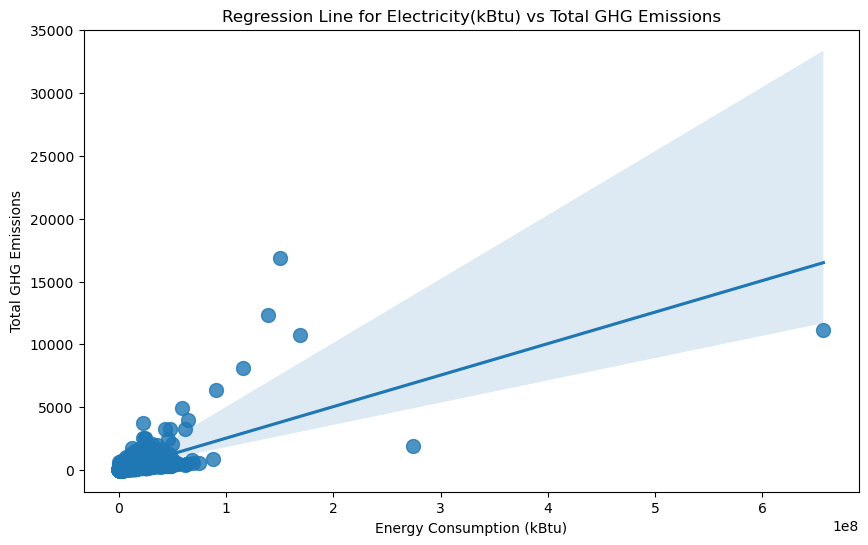

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

 
 

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Electricity(kBtu)', y='TotalGHGEmissions', data=df2, scatter_kws={'s': 100})
plt.title('Regression Line for Electricity(kBtu) vs Total GHG Emissions')
plt.xlabel('Energy Consumption (kBtu)')
plt.ylabel('Total GHG Emissions')
plt.show()


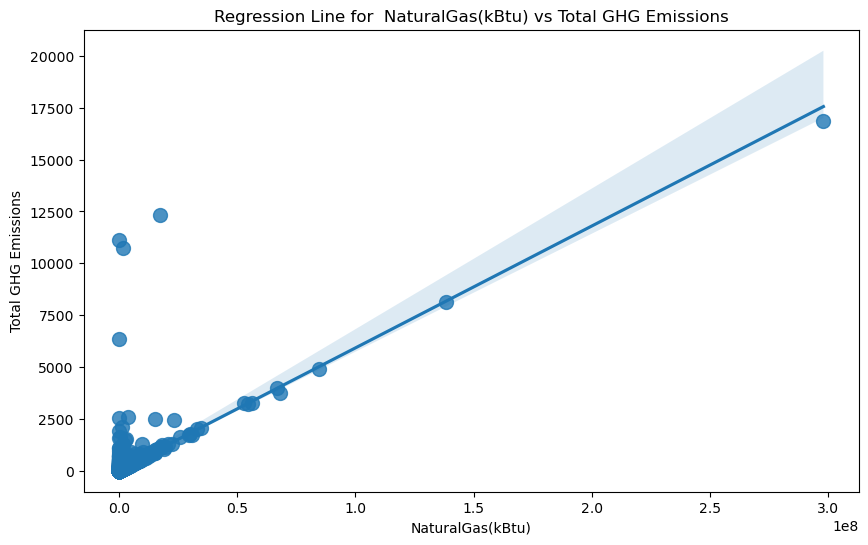

In [24]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='NaturalGas(kBtu)', y='TotalGHGEmissions', data=df2, scatter_kws={'s': 100})
plt.title('Regression Line for  NaturalGas(kBtu) vs Total GHG Emissions')
plt.xlabel('NaturalGas(kBtu)')
plt.ylabel('Total GHG Emissions')
plt.show()

In [ ]:
##on remarque que le gaz naturel et l'ectricite sont deux facteurs qui augumentent l'emission du gaz de l'effet de serre .